In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import collections
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('Genesis_AnomalyLabels.csv')
df

,Timestamp,Label,MotorData.ActCurrent,MotorData.ActPosition,MotorData.ActSpeed,MotorData.IsAcceleration,MotorData.IsForce,MotorData.Motor_Pos1reached,MotorData.Motor_Pos2reached,MotorData.Motor_Pos3reached,MotorData.Motor_Pos4reached,NVL_Recv_Ind.GL_Metall,NVL_Recv_Ind.GL_NonMetall,NVL_Recv_Storage.GL_I_ProcessStarted,NVL_Recv_Storage.GL_I_Slider_IN,NVL_Recv_Storage.GL_I_Slider_OUT,NVL_Recv_Storage.GL_LightBarrier,NVL_Send_Storage.ActivateStorage,PLC_PRG.Gripper,PLC_PRG.MaterialIsMetal
0,1.461149e+09,0,-5,268975,0,0,-1,0,0,0,0,0,1,0,1,0,1,0,0,0
1,1.461149e+09,0,0,268975,0,0,-1,0,0,0,0,0,1,0,1,0,1,0,0,0
2,1.461149e+09,0,-5,268975,0,0,-3,0,0,0,0,0,1,0,1,0,1,0,0,0
3,1.461149e+09,0,0,268975,0,0,4,0,0,0,0,0,1,0,1,0,1,0,0,0
4,1.461149e+09,0,0,268975,0,0,4,0,0,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16215,1.461149e+09,0,8,260014,0,0,-1,0,0,1,0,0,1,0,1,0,1,0,0,0
16216,1.461149e+09,0,-21,260014,0,0,-4,0,0,1,0,0,1,0,1,0,1,0,0,0
16217,1.461149e+09,0,-17,260014,0,0,-4,0,0,1,0,0,1,0,1,0,1,0,0,0
16218,1.461149e+09,0,-17,260014,0,0,-4,0,0,1,0,0,1,0,1,0,1,0,0,0


import numpy as np
from google.colab import autoviz
df_2698757204225572075 = autoviz.get_registered_df('df_2698757204225572075')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2698757204225572075, *['Label'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4516151482010963913 = autoviz.get_registered_df('df_4516151482010963913')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4516151482010963913, *['MotorData.ActCurrent'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4863356063338532134 = autoviz.get_registered_df('df_4863356063338532134')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4863356063338532134, *['MotorData.ActPosition'], **{})
chart

import numpy as np
from google.colab import autoviz
df_158210771187732020 = autoviz.get_registered_df('df_158210771187732020')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_158210771187732020, *['MotorData.ActSpeed'], **{})
chart

import numpy as np
from google.colab import autoviz
df_854080163604691390 = autoviz.get_registered_df('df_854080163604691390')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_854080163604691390, *['Label'], **{})
chart

import numpy as np
from google.colab import autoviz
df_460107857710448765 = autoviz.get_registered_df('df_460107857710448765')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_460107857710448765, *['MotorData.ActCurrent'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4913293593745372095 = autoviz.get_registered_df('df_4913293593745372095')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4913293593745372095, *['MotorData.ActPosition'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6763005716037715555 = autoviz.get_registered_df('df_6763005716037715555')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6763005716037715555, *['MotorData.ActSpeed'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1864443349150234739 = autoviz.get_registered_df('df_1864443349150234739')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1864443349150234739, *[[['Label', 'MotorData.ActCurrent'], ['MotorData.ActCurrent', 'MotorData.ActPosition'], ['MotorData.ActPosition', 'MotorData.ActSpeed'], ['MotorData.ActSpeed', 'MotorData.IsAcceleration']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8588748424023957585 = autoviz.get_registered_df('df_8588748424023957585')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8588748424023957585, *['Timestamp', 'Label', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4146764646092984050 = autoviz.get_registered_df('df_4146764646092984050')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4146764646092984050, *['Timestamp', 'MotorData.ActCurrent', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_5367709040278702936 = autoviz.get_registered_df('df_5367709040278702936')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5367709040278702936, *['Timestamp', 'MotorData.ActPosition', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_7056805365746084159 = autoviz.get_registered_df('df_7056805365746084159')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7056805365746084159, *['Timestamp', 'MotorData.ActSpeed', None], **{})
chart

In [ ]:
print(df.describe())

          Timestamp         Label  MotorData.ActCurrent  \
count  1.622000e+04  16220.000000          16220.000000   
mean   1.461149e+09      0.003761             -4.714057   
std    2.195389e+02      0.071437            397.293682   
min    1.461149e+09      0.000000          -1181.000000   
25%    1.461149e+09      0.000000           -174.000000   
50%    1.461149e+09      0.000000              3.000000   
75%    1.461149e+09      0.000000            189.000000   
max    1.461149e+09      2.000000           1181.000000   

       MotorData.ActPosition  MotorData.ActSpeed  MotorData.IsAcceleration  \
count           16220.000000        16220.000000              16220.000000   
mean           207315.832922          139.400247                 -1.587670   
std            107775.856354        57928.033474                513.080888   
min             22011.000000      -422617.000000              -3045.000000   
25%            140012.000000       -53352.750000                  0.000000   


In [ ]:
df= df.drop("Timestamp", axis=1)

<Axes: >

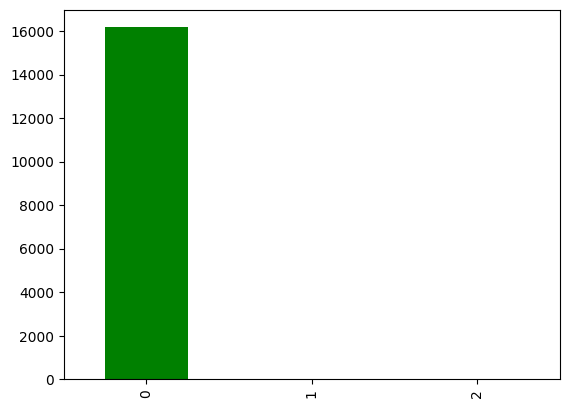

In [ ]:
df.Label.value_counts().plot(kind = 'bar', color = 'green')

In [ ]:
print(df.groupby('Label').size())

Label
0    16170
1       39
2       11
dtype: int64


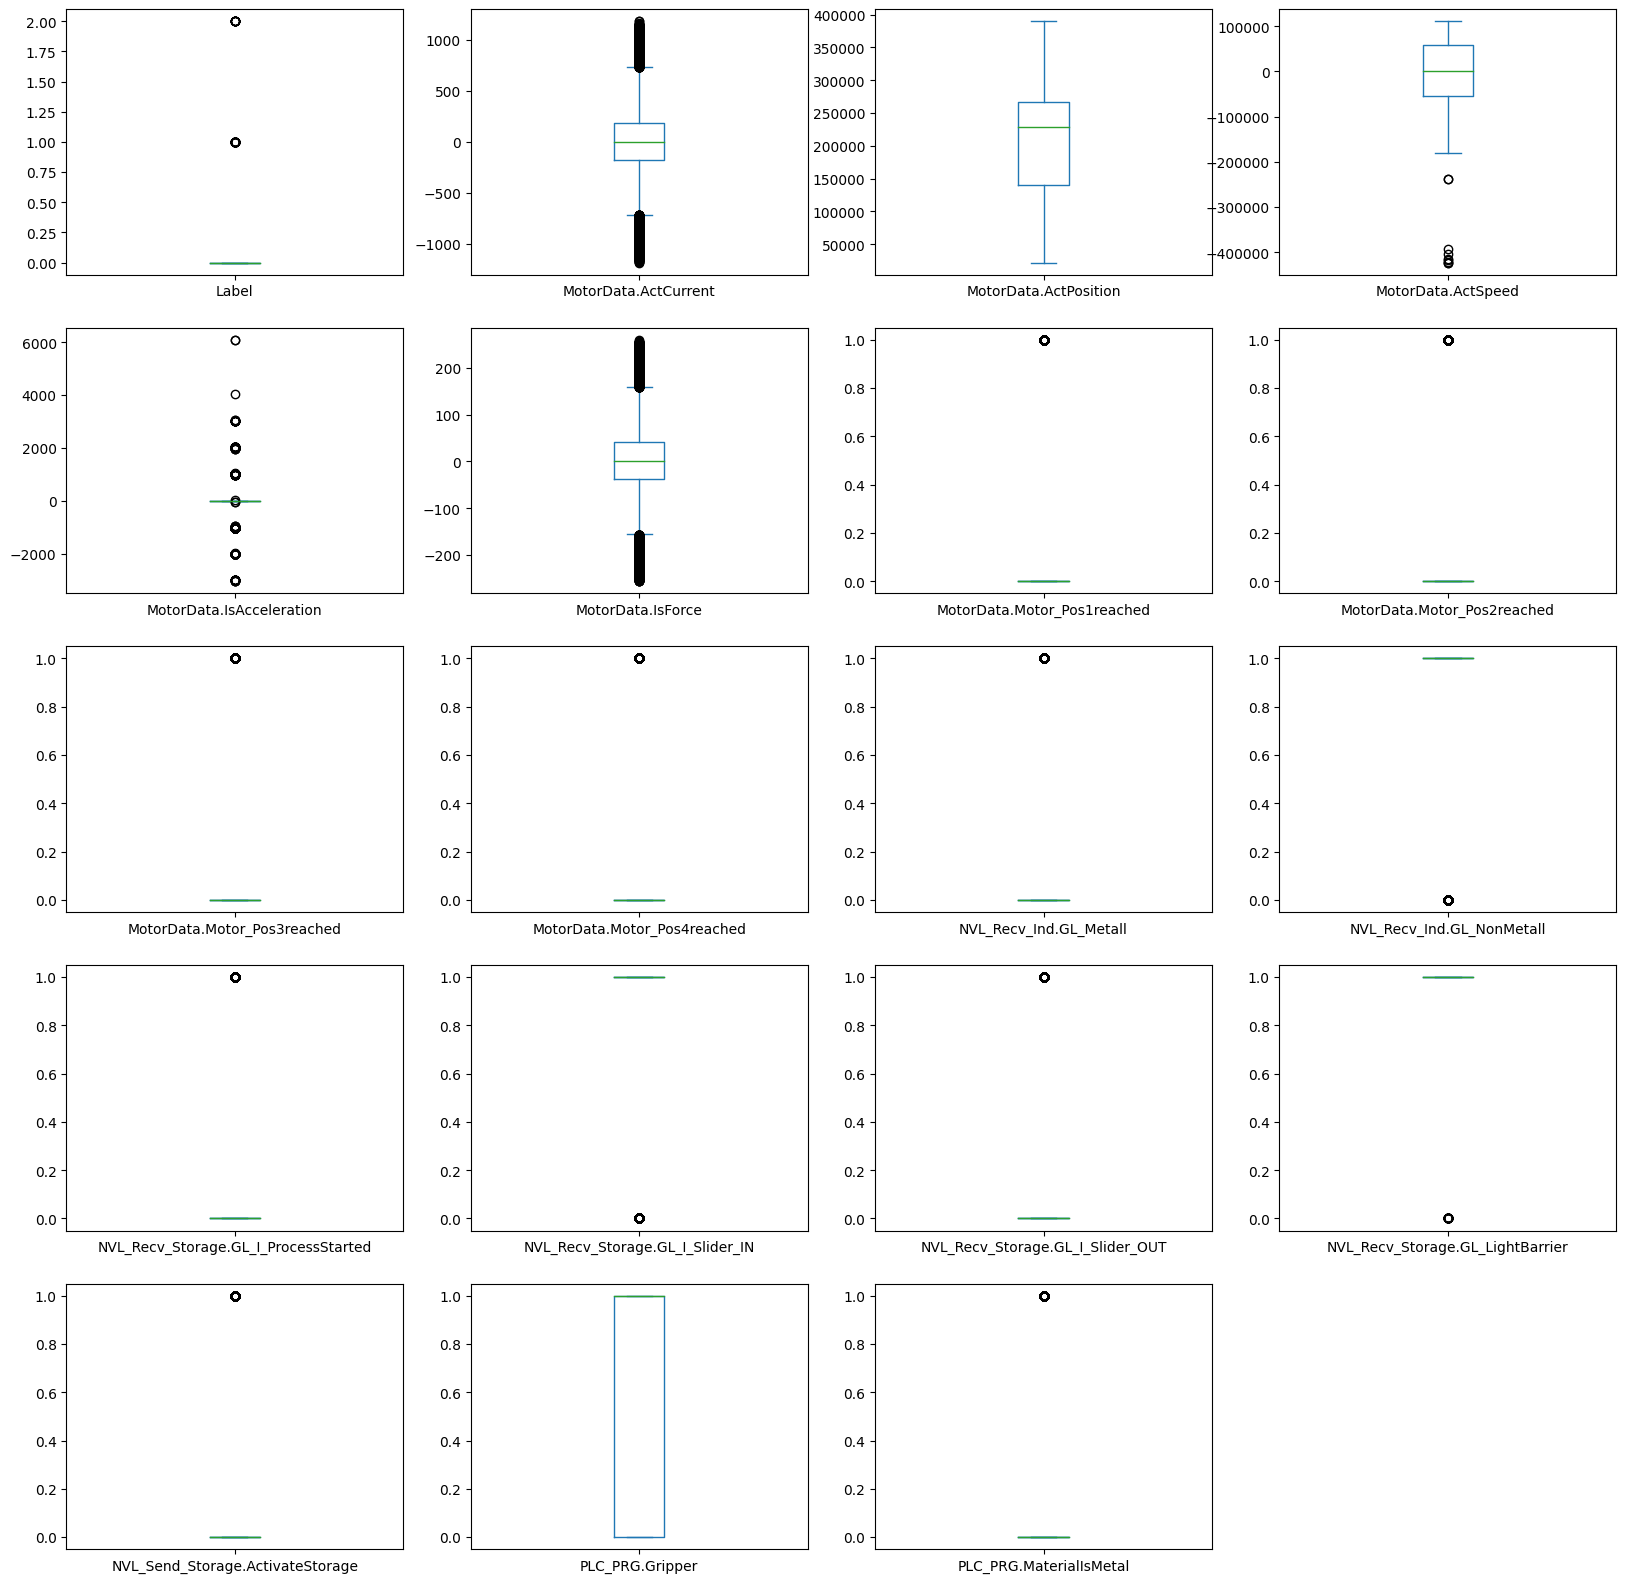

In [ ]:
df.plot(kind='box', subplots=True, figsize=(20,20), layout=(5,4), sharex=False, sharey=False)
plt.show()

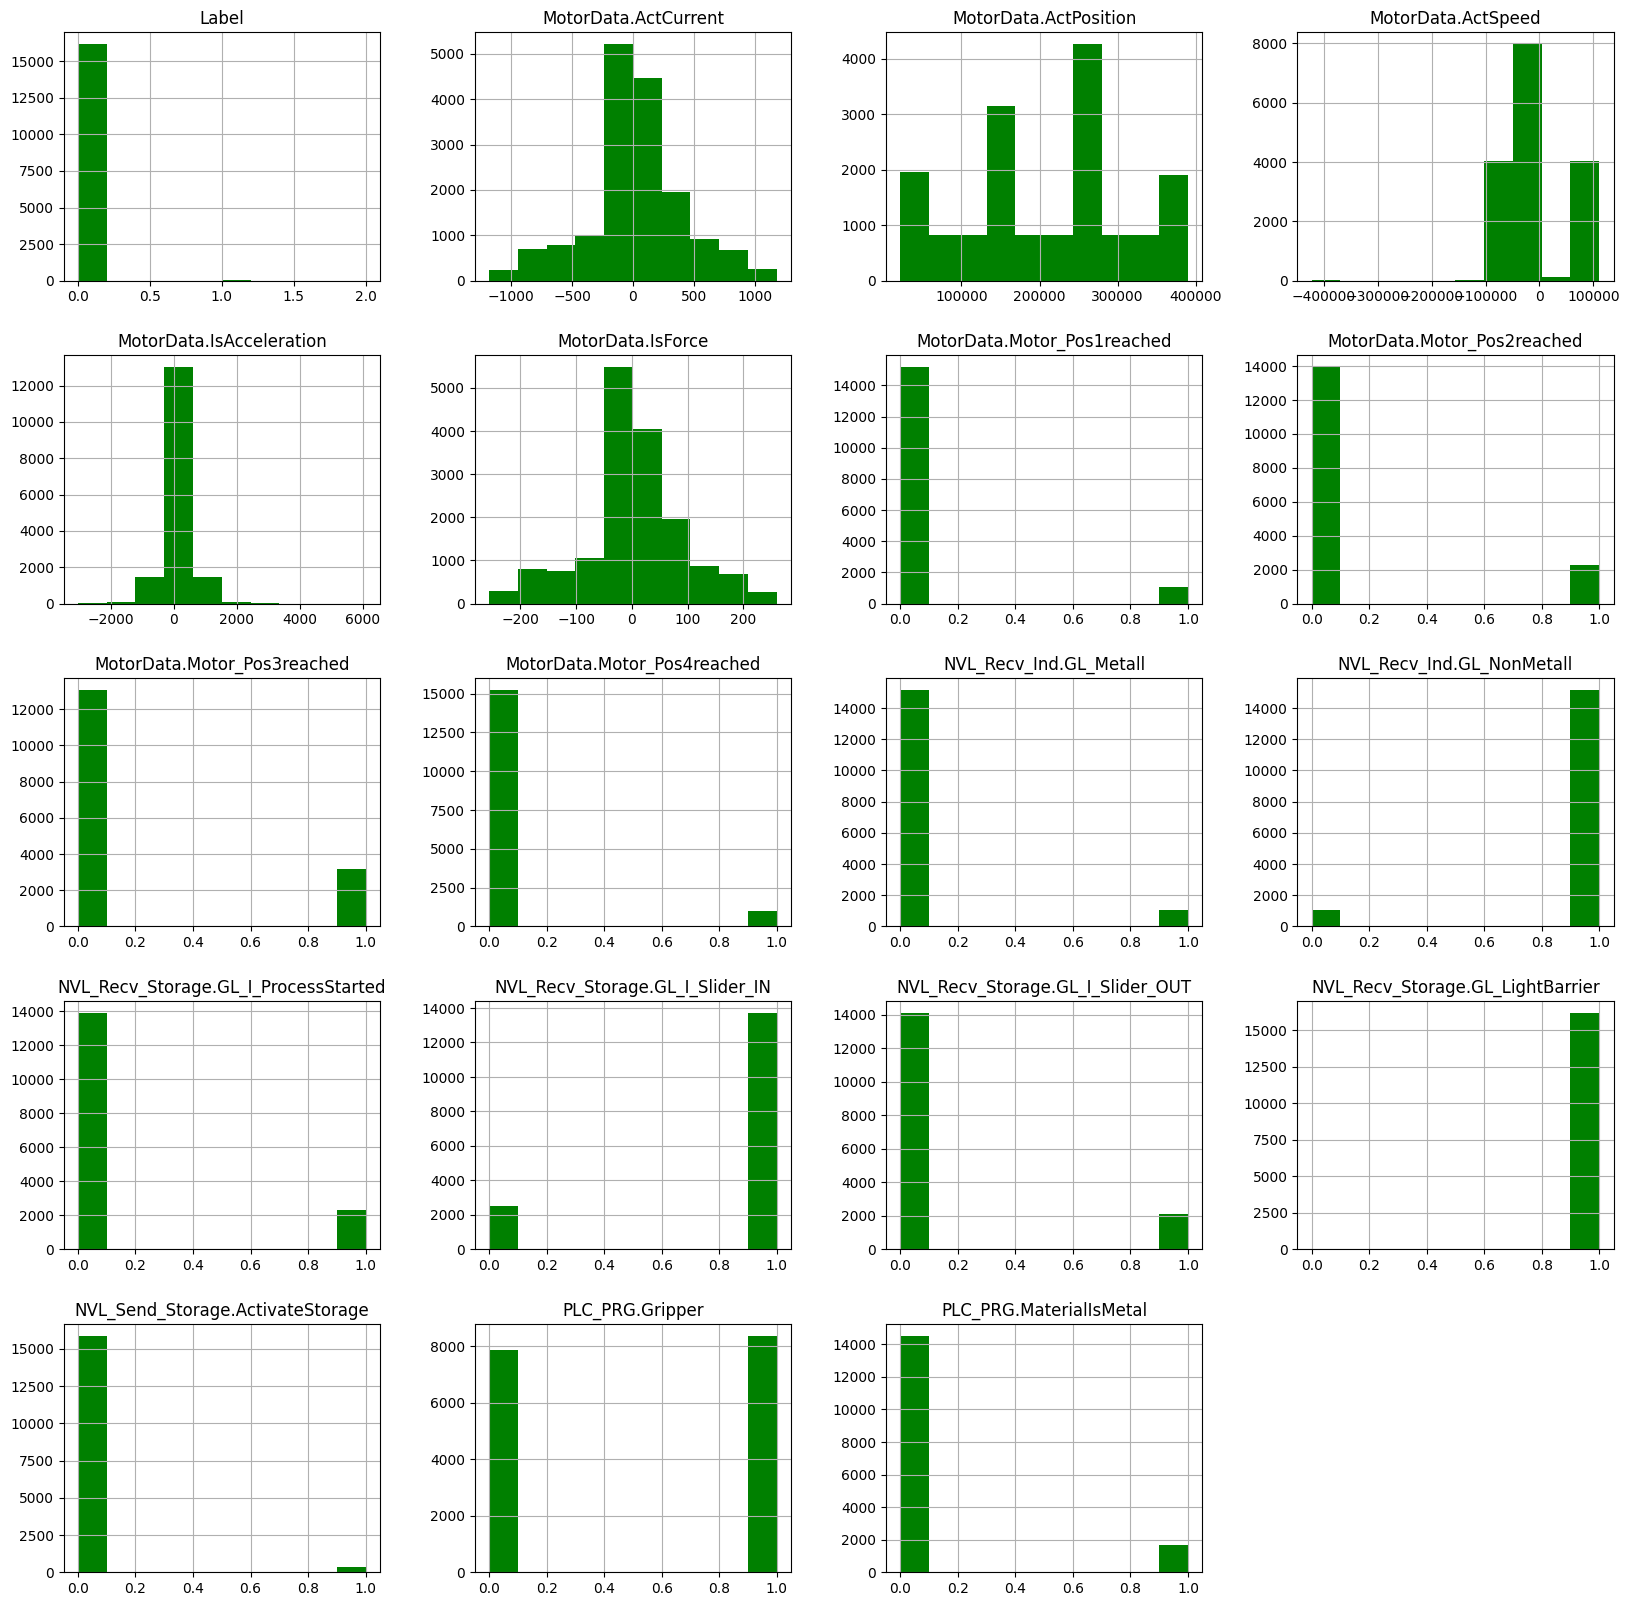

In [ ]:
df.hist(figsize=(20,20), layout=(5,4), color = 'green')
plt.show()

<ipython-input-22-1a1fda83e1d8>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cov, dtype=np.bool)


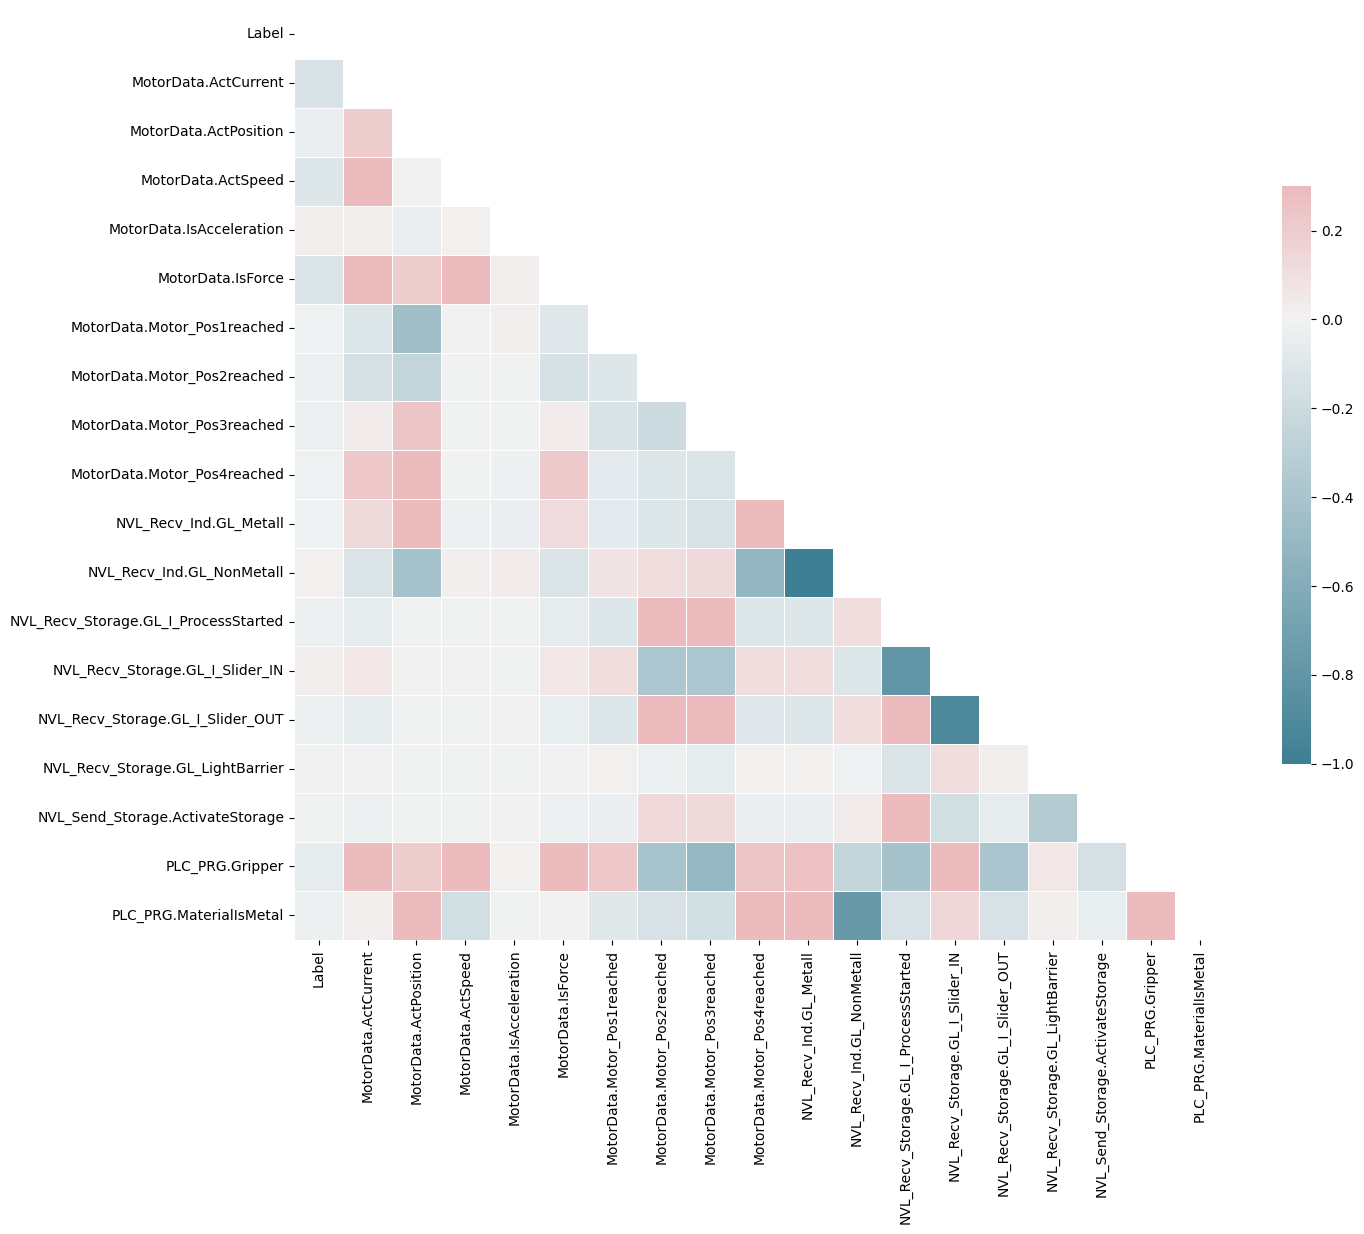

In [ ]:
cov = df.corr()
fig = plt.figure(figsize = (15,15))

mask = np.zeros_like(cov, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(cov, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
df["Label"] = np.where(df["Label"] == 2, 1, df["Label"])

In [ ]:
X= df.copy()
y = df.pop('Label')
validation_size = 0.2
x_train, x_val, y_train, y_val = model_selection.train_test_split(X, y,
                                                  test_size=validation_size,
                                                  random_state=12, stratify=y)

In [ ]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [ ]:
collections.Counter(y_train_res)

Counter({0: 12936, 1: 12936})

In [ ]:
collections.Counter(y_val)

Counter({0: 3234, 1: 10})

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
scoring = make_scorer(f1_score , average='macro')

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr',class_weight = 'balanced' )))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	cv_results = model_selection.cross_val_score(model, x_train_res, y_train_res, cv=skf, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LR: 0.926205 (0.005390)
KNN: 0.996367 (0.000651)
CART: 1.000000 (0.000000)
NB: 0.979665 (0.002611)


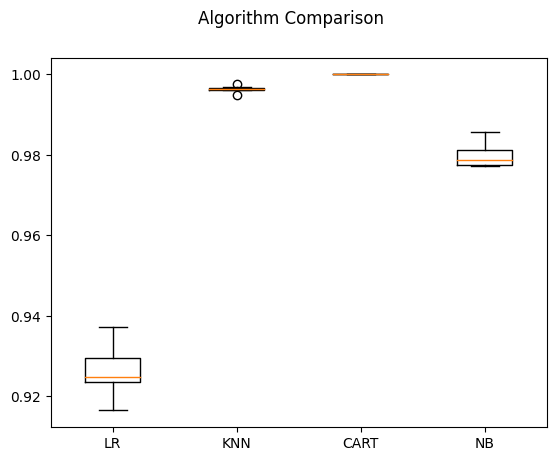

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

decions_tree= DecisionTreeClassifier()
decions_tree.fit(x_train, y_train)

# Make predictions
predictions = decions_tree.predict(x_train)

# Calculate kappa
kappa = cohen_kappa_score(y_train, predictions)

# Print accuracy, kappa, confusion matrix, classification report, precision, recall, and f1 score
print("Accuracy = ", accuracy_score(y_train, predictions))
print('Cohens kappa: %f' % kappa)
print("Confusion Matrix = ")
print(confusion_matrix(y_train, predictions))
print("Classification Report = ")
print(classification_report(y_train, predictions))
print('Precision for positive label: ', precision_score(y_train, predictions, pos_label=1, average='binary'))
print ('Recall for positive label: ', recall_score(y_train, predictions, pos_label=1, average='binary'))
print ('F1 Score for positive label: ', f1_score(y_train, predictions, pos_label=1, average='binary'))


Accuracy =  1.0
Cohens kappa: 1.000000
Confusion Matrix = 
[[12936     0]
 [    0    40]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12936
           1       1.00      1.00      1.00        40

    accuracy                           1.00     12976
   macro avg       1.00      1.00      1.00     12976
weighted avg       1.00      1.00      1.00     12976

Precision for positive label:  1.0
Recall for positive label:  1.0
F1 Score for positive label:  1.0


In [ ]:
decions_tree= DecisionTreeClassifier()
decions_tree.fit(x_train, y_train)

# Make predictions
predictions = decions_tree.predict(x_val)

# Calculate kappa
kappa = cohen_kappa_score(y_val, predictions)

# Print accuracy, kappa, confusion matrix, classification report, precision, recall, and f1 score
print("Accuracy = ", accuracy_score(y_val, predictions))
print('Cohens kappa: %f' % kappa)
print("Confusion Matrix = ")
print(confusion_matrix(y_val, predictions))
print("Classification Report = ")
print(classification_report(y_val, predictions))
print('Precision for positive label: ', precision_score(y_val, predictions, pos_label=1, average='binary'))
print ('Recall for positive label: ', recall_score(y_val, predictions, pos_label=1, average='binary'))
print ('F1 Score for positive label: ', f1_score(y_val, predictions, pos_label=1, average='binary'))


Accuracy =  1.0
Cohens kappa: 1.000000
Confusion Matrix = 
[[3234    0]
 [   0   10]]
Classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3234
           1       1.00      1.00      1.00        10

    accuracy                           1.00      3244
   macro avg       1.00      1.00      1.00      3244
weighted avg       1.00      1.00      1.00      3244

Precision for positive label:  1.0
Recall for positive label:  1.0
F1 Score for positive label:  1.0
